# Manipulate the data set for DT

In [1]:
import pandas as pd
import io 
from scipy import misc
from sklearn.tree import DecisionTreeClassifier# 66 69
from sklearn import tree

In [2]:
##Importing data from 2017-01 to 2019-07
##Printing head and tail
df = pd.read_csv('C:\Sth\study\AOTPall_12Routes.csv', low_memory=False)

In [3]:
df = df[['FlightDate','Reporting_Airline','Tail_Number','Origin','Dest','CRSDepTime','DepDelay','CRSArrTime','ArrDelay']]

In [4]:
pwd

'C:\\Sth\\study\\major course\\2019 Fall\\DAEN690\\code\\andy\\DT'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140290 entries, 0 to 140289
Data columns (total 9 columns):
FlightDate           140290 non-null object
Reporting_Airline    140290 non-null object
Tail_Number          140290 non-null object
Origin               140290 non-null object
Dest                 140290 non-null object
CRSDepTime           140290 non-null int64
DepDelay             140290 non-null int64
CRSArrTime           140290 non-null int64
ArrDelay             140290 non-null int64
dtypes: int64(4), object(5)
memory usage: 9.6+ MB


In [6]:
df_group = df.groupby(by = ['FlightDate','Reporting_Airline','Tail_Number']).filter(lambda group:len(group)==2)

In [7]:
df_group = df_group.sort_values(by = ['Reporting_Airline','Tail_Number','FlightDate','CRSDepTime'],)
df_group.head()

,FlightDate,Reporting_Airline,Tail_Number,Origin,Dest,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
57945,2018-01-02,AA,N101NN,JFK,SFO,1850,14,2235,-5
57869,2018-01-02,AA,N101NN,SFO,JFK,2325,4,758,19
57954,2018-01-16,AA,N101NN,JFK,SFO,1840,-1,2236,-45
57880,2018-01-16,AA,N101NN,SFO,JFK,2330,-5,807,-7
57959,2018-01-22,AA,N101NN,JFK,SFO,1840,-7,2236,-48


In [8]:
df_group = df_group.rename(columns={'Origin':'Origin1','Dest':'Dest1','CRSDepTime':'CRSDepTime1','DepDelay':'DepDelay1','CRSArrTime':'CRSArrTime1','ArrDelay':'ArrDelay1'})
df_group.head()

,FlightDate,Reporting_Airline,Tail_Number,Origin1,Dest1,CRSDepTime1,DepDelay1,CRSArrTime1,ArrDelay1
57945,2018-01-02,AA,N101NN,JFK,SFO,1850,14,2235,-5
57869,2018-01-02,AA,N101NN,SFO,JFK,2325,4,758,19
57954,2018-01-16,AA,N101NN,JFK,SFO,1840,-1,2236,-45
57880,2018-01-16,AA,N101NN,SFO,JFK,2330,-5,807,-7
57959,2018-01-22,AA,N101NN,JFK,SFO,1840,-7,2236,-48


In [9]:
pd.concat([df_group, pd.DataFrame(columns={'Origin2','Dest2','CRSDepTime2','DepDelay2','CRSArrTime2','ArrDelay2'})])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ArrDelay1,ArrDelay2,CRSArrTime1,CRSArrTime2,CRSDepTime1,CRSDepTime2,DepDelay1,DepDelay2,Dest1,Dest2,FlightDate,Origin1,Origin2,Reporting_Airline,Tail_Number
57945,-5.0,NaN,2235.0,NaN,1850.0,NaN,14.0,NaN,SFO,NaN,2018-01-02,JFK,NaN,AA,N101NN
57869,19.0,NaN,758.0,NaN,2325.0,NaN,4.0,NaN,JFK,NaN,2018-01-02,SFO,NaN,AA,N101NN
57954,-45.0,NaN,2236.0,NaN,1840.0,NaN,-1.0,NaN,SFO,NaN,2018-01-16,JFK,NaN,AA,N101NN
57880,-7.0,NaN,807.0,NaN,2330.0,NaN,-5.0,NaN,JFK,NaN,2018-01-16,SFO,NaN,AA,N101NN
57959,-48.0,NaN,2236.0,NaN,1840.0,NaN,-7.0,NaN,SFO,NaN,2018-01-22,JFK,NaN,AA,N101NN
57886,3.0,NaN,807.0,NaN,2330.0,NaN,-12.0,NaN,JFK,NaN,2018-01-22,SFO,NaN,AA,N101NN
58050,-11.0,NaN,1448.0,NaN,1100.0,NaN,-7.0,NaN,SFO,NaN,2018-01-25,JFK,NaN,AA,N101NN
57913,4.0,NaN,10.0,NaN,1540.0,NaN,29.0,NaN,JFK,NaN,2018-01-25,SFO,NaN,AA,N101NN
57475,-23.0,NaN,2017.0,NaN,1620.0,NaN,-8.0,NaN,SFO,NaN,2018-01-31,JFK,NaN,AA,N101NN
58079,-51.0,NaN,645.0,NaN,2210.0,NaN,-8.0,NaN,JFK,NaN,2018-01-31,SFO,NaN,AA,N101NN


In [10]:
df_new = df_group.reindex(columns={'FlightDate','Reporting_Airline','Tail_Number','Origin1','Dest1','CRSDepTime1','DepDelay1','CRSArrTime1','ArrDelay1','Origin2','Dest2','CRSDepTime2','DepDelay2','CRSArrTime2','ArrDelay2'})
df_new = df_new[['FlightDate','Reporting_Airline','Tail_Number','Origin1','Dest1','CRSDepTime1','DepDelay1','CRSArrTime1','ArrDelay1','Origin2','Dest2','CRSDepTime2','DepDelay2','CRSArrTime2','ArrDelay2']]

In [11]:
df_group.merge(df_group,left_on=["FlightDate","Reporting_Airline","Tail_Number"],right_on=["FlightDate","Reporting_Airline","Tail_Number"])

,FlightDate,Reporting_Airline,Tail_Number,Origin1_x,Dest1_x,CRSDepTime1_x,DepDelay1_x,CRSArrTime1_x,ArrDelay1_x,Origin1_y,Dest1_y,CRSDepTime1_y,DepDelay1_y,CRSArrTime1_y,ArrDelay1_y
0,2018-01-02,AA,N101NN,JFK,SFO,1850,14,2235,-5,JFK,SFO,1850,14,2235,-5
1,2018-01-02,AA,N101NN,JFK,SFO,1850,14,2235,-5,SFO,JFK,2325,4,758,19
2,2018-01-02,AA,N101NN,SFO,JFK,2325,4,758,19,JFK,SFO,1850,14,2235,-5
3,2018-01-02,AA,N101NN,SFO,JFK,2325,4,758,19,SFO,JFK,2325,4,758,19
4,2018-01-16,AA,N101NN,JFK,SFO,1840,-1,2236,-45,JFK,SFO,1840,-1,2236,-45
5,2018-01-16,AA,N101NN,JFK,SFO,1840,-1,2236,-45,SFO,JFK,2330,-5,807,-7
6,2018-01-16,AA,N101NN,SFO,JFK,2330,-5,807,-7,JFK,SFO,1840,-1,2236,-45
7,2018-01-16,AA,N101NN,SFO,JFK,2330,-5,807,-7,SFO,JFK,2330,-5,807,-7
8,2018-01-22,AA,N101NN,JFK,SFO,1840,-7,2236,-48,JFK,SFO,1840,-7,2236,-48
9,2018-01-22,AA,N101NN,JFK,SFO,1840,-7,2236,-48,SFO,JFK,2330,-12,807,3


In [12]:
df_group_odd = df_group.iloc[::2]
df_group_even = df_group.iloc[1::2]
df_new = df_group_odd.merge(df_group_even,left_on=["FlightDate","Reporting_Airline","Tail_Number"],right_on=["FlightDate","Reporting_Airline","Tail_Number"])


In [13]:
df_new

,FlightDate,Reporting_Airline,Tail_Number,Origin1_x,Dest1_x,CRSDepTime1_x,DepDelay1_x,CRSArrTime1_x,ArrDelay1_x,Origin1_y,Dest1_y,CRSDepTime1_y,DepDelay1_y,CRSArrTime1_y,ArrDelay1_y
0,2018-01-02,AA,N101NN,JFK,SFO,1850,14,2235,-5,SFO,JFK,2325,4,758,19
1,2018-01-16,AA,N101NN,JFK,SFO,1840,-1,2236,-45,SFO,JFK,2330,-5,807,-7
2,2018-01-22,AA,N101NN,JFK,SFO,1840,-7,2236,-48,SFO,JFK,2330,-12,807,3
3,2018-01-25,AA,N101NN,JFK,SFO,1100,-7,1448,-11,SFO,JFK,1540,29,10,4
4,2018-01-31,AA,N101NN,JFK,SFO,1620,-8,2017,-23,SFO,JFK,2210,-8,645,-51
5,2018-02-02,AA,N101NN,JFK,SFO,1100,-5,1448,-17,SFO,JFK,1540,-4,10,-37
6,2018-02-04,AA,N101NN,JFK,SFO,1100,-9,1448,-29,SFO,JFK,1540,-2,10,-17
7,2018-02-10,AA,N101NN,JFK,SFO,1840,-2,2236,-1,SFO,JFK,2330,-8,807,-43
8,2018-02-18,AA,N101NN,JFK,SFO,1725,-6,2120,6,SFO,JFK,2210,-1,645,-29
9,2018-02-21,AA,N101NN,JFK,SFO,700,-6,1049,-31,SFO,JFK,1142,2,2025,-20


In [15]:
#add one column based on DepDealy1_x
df_new.loc[df_new.DepDelay1_x>=15,'hpDepDelay1_x']=2
df_new.loc[(df_new.DepDelay1_x<=15) & (df_new.DepDelay1_x>=0),'hpDepDelay1_x']=1
df_new.loc[df_new.DepDelay1_x<=0,'hpDepDelay1_x']=0
#add one column based on ArrDelay1_x
df_new.loc[df_new.ArrDelay1_x>=15,'hpArrDelay1_x']=2
df_new.loc[(df_new.ArrDelay1_x<=15) & (df_new.ArrDelay1_x>=0),'hpArrDelay1_x']=1
df_new.loc[df_new.ArrDelay1_x<=0,'hpArrDelay1_x']=0
#add one column based on DepDealy1_y
df_new.loc[df_new.DepDelay1_y>=15,'hpDepDelay1_y']=2
df_new.loc[(df_new.DepDelay1_y<=15) & (df_new.DepDelay1_y>=0),'hpDepDelay1_y']=1
df_new.loc[df_new.DepDelay1_y<=0,'hpDepDelay1_y']=0

In [16]:
#df_new=df_new.drop('hpDepDelay1_y',axis='columns')


In [17]:
#df_new=df_new.drop('hpDepDelau1_x',axis='columns')

In [18]:
df_new.tail(n=90)

,FlightDate,Reporting_Airline,Tail_Number,Origin1_x,Dest1_x,CRSDepTime1_x,DepDelay1_x,CRSArrTime1_x,ArrDelay1_x,Origin1_y,Dest1_y,CRSDepTime1_y,DepDelay1_y,CRSArrTime1_y,ArrDelay1_y,hpDepDelay1_x,hpArrDelay1_x,hpDepDelay1_y
22426,2018-01-13,YV,N86316,IAD,BOS,1230,36,1405,15,BOS,IAD,1442,7,1626,3,2.0,1.0,1.0
22427,2018-11-03,YV,N86347,IAD,BOS,1705,-4,1842,-16,BOS,IAD,1939,-3,2116,-7,0.0,0.0,0.0
22428,2018-02-10,YV,N87345,IAD,BOS,1230,0,1405,-12,BOS,IAD,1442,-1,1626,-7,0.0,0.0,0.0
22429,2019-02-05,YV,N87345,IAD,BOS,1705,-1,1839,5,BOS,IAD,1935,-2,2119,-11,0.0,1.0,0.0
22430,2018-03-31,YV,N87353,IAD,BOS,1710,-1,1845,-1,BOS,IAD,1930,-1,2115,-3,0.0,0.0,0.0
22431,2019-01-15,YV,N88301,IAD,BOS,1705,0,1839,10,BOS,IAD,1935,0,2119,-12,0.0,1.0,0.0
22432,2018-05-19,YV,N88310,IAD,BOS,1230,-6,1400,-6,BOS,IAD,1445,49,1621,46,0.0,0.0,2.0
22433,2018-11-10,YV,N88330,IAD,BOS,1705,-1,1842,-5,BOS,IAD,1939,-5,2116,-2,0.0,0.0,0.0
22434,2018-02-03,YV,N88331,IAD,BOS,1230,-4,1405,-17,BOS,IAD,1442,-5,1626,-16,0.0,0.0,0.0
22435,2019-01-29,YV,N88335,IAD,BOS,1705,0,1839,15,BOS,IAD,1935,-1,2119,-4,0.0,1.0,0.0


In [19]:
target=df_new['hpDepDelay1_y']

In [20]:
inputs_n=df_new[['hpDepDelay1_x','hpArrDelay1_x']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_n,target,test_size=0.2)

In [23]:
len(inputs_train)

18012

In [24]:
len(target_train)

18012

In [25]:
#Define a DecisionTreeClassifier 
#The scikit-learn dt parameters
model=DecisionTreeClassifier()

In [28]:
#train the modal
model.fit(inputs_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Visualization the DT

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

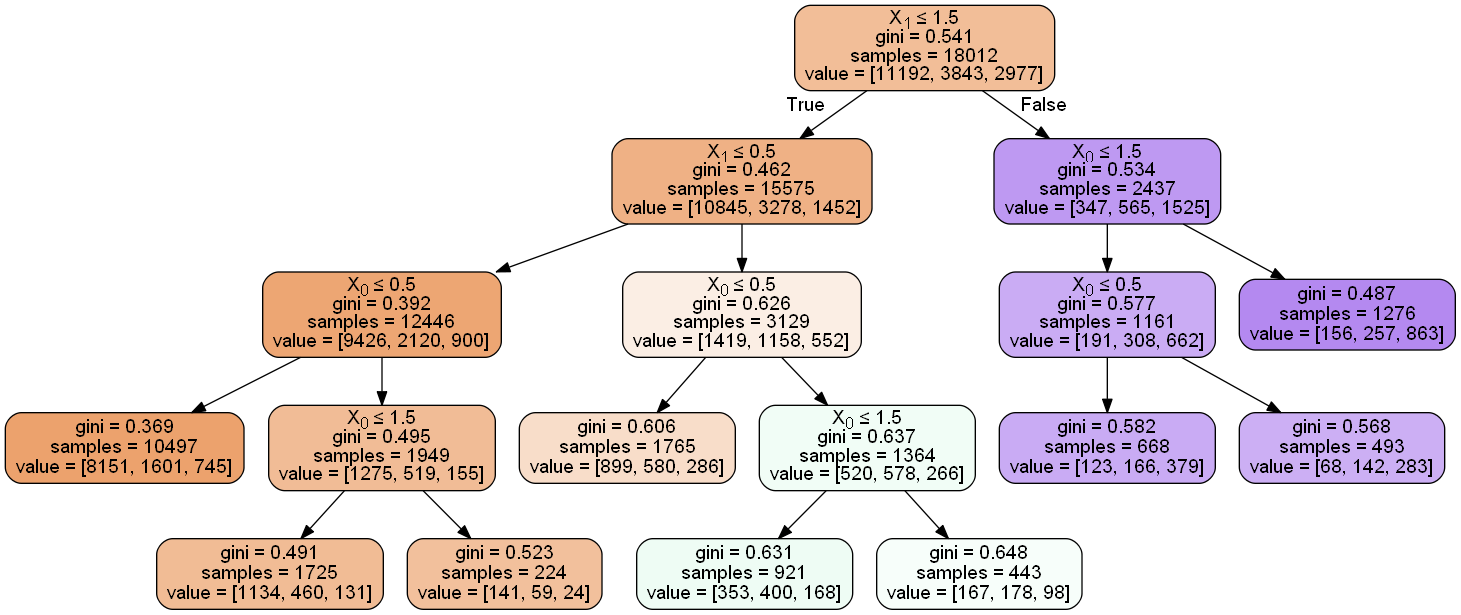

In [30]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Cross Validation

In [31]:
# cross_val_score function 
from sklearn.model_selection import cross_val_score

In [41]:
# 1st argument:classifier, 2nd: x, 3rd:y, 4th:
score=cross_val_score(model, inputs_n, target,cv=10)

In [43]:
import numpy as np
# avaerage accuracy score
np.average(score)

0.6891965651155328

In [33]:
#actual second time of departure delay is -2
model.predict([[11,-9]]) 

array([0.])

In [34]:
#actual second time of departure delay is 7
model.predict([[36,15]]) 

array([2.])